# Bias-Variance Trade-Off

In previous notebooks we have mentioned <i>overfitting</i> and the use of cross-validation or validation sets to combat it. In this notebook we will introduce one of the key supervised learning concepts, the <i>bias-variance trade-off</i>, which should further illustrate over and underfitting.

## What we will accomplish

In this notebook we will:
- Discuss bias of the estimate, $\hat{f}$, (underfitting),
- Discuss variance of the estimate, $\hat{f}$, (overfitting) and
- Demonstrate the trade-off between them as you increase or decrease the "complexity" of the model.

In [1]:
# import the packages we'll use
## For data handling
import pandas as pd
import numpy as np
np.random.seed(440)

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## The bias-variance trade-off

Let's return to our supervised learning framework, remember we try to fit the following model:
$$
y = f(X) + \epsilon,
$$
where $f$ is some function.

When we fit the model we produce some estimate of $f$ called $\hat{f}$. 

As we have discussed we are interested in the generalization error of our algorithm. Like with CV when we consider the generalization error we look at the expected value of the squared difference between $y$ and $\hat{y}$. If we let $y_0$ and $X_0$ denote a single test set, we can write this mathematically as:

$$
E\left[ \left( y_0 - \hat{y_0} \right)^2 \right]= E\left[ \left( y_0 - \hat{f}(X_0) \right)^2 \right] = E \left[ \left( f(X_0) - \hat{f}(X_0) + \epsilon   \right)^2 \right],
$$

where all expectations are taken over the probability space of all possible training sets.

With a little manipulation you can rewrite this as:

$$
\text{Var}\left(\hat{f}(X_0)\right) + \left[ \text{Bias}\left( \hat{f}(X_0) \right) \right]^2 + \text{Var}(\epsilon)
$$

$$
= \text{Variance of }\hat{f} + \text{Bias squared of }\hat{f} + \text{irreducible error}.
$$

Recall that $\text{Bias}$ is given by, $\text{Bias}\left(\hat{f}(X)\right) = E\left( f(X) - \hat{f}(X) \right)$. One way to think about it is how far on average the estimator $\hat{f}$ is from the thing it is estimating, $f$.

Since $\text{Var}$ and $\text{Bias}^2$ are both nonnegative, the best we can do is produce an algorithm with irreducible error $\text{Var}(\epsilon)$. This means we can reduce our generalization error by reducing our $\text{Bias}$ or our $\text{Var}$. However, it is often not possible to reduce both simultaneously. Many times lowering an algorithm's $\text{Bias}$ leads to an increase in its $\text{Var}$. Typically high bias indicates underfitting the data, while high variance means overfitting.

We will now show this in action with linear regression.

In [2]:
## Make some data
x = np.linspace(-3,3,500)
y = x*(x-1) + 1.2*np.random.randn(500)

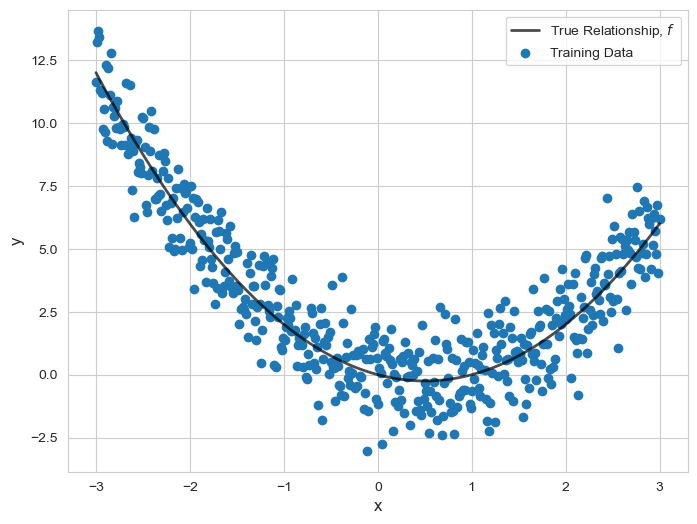

In [3]:
plt.figure(figsize = (8,6))

plt.plot(x, x*(x-1),'k', label = "True Relationship, $f$", alpha = .7, linewidth=2)
plt.scatter(x, y, label = "Training Data")

plt.ylabel("y", fontsize=12)
plt.xlabel("x", fontsize=12)

plt.legend(fontsize=10)

plt.show()

### A model with high bias

A linear regression model with high bias but low variance would be to use no predictors and just take the mean observed $y$ value, our baseline model. 

This would be way underfitting the data, which has a clear pattern:
- It is high bias because we are far from the true relationship between $y$ and $x$. 
- It is low variance because with a large enough sample the law of large numbers tells us the sample mean should be close to $E(y)$. So as long as our training sample is large enough then we will not vary much over different samples.

Such models are said to <i>underfit</i> the data.

### A model with high variance 

A linear regression model with low bias but high variance would be to use a high degree polynomial of $x$:
- This is low bias because a high degree polynomial will more closely fit the true relationship. 
- It will have high variance because as the degree of the fitting polynomial increases the more likely it is that the regression polynomial will attempt to fit all of the training points perfectly, meaning that you will get wildly different fits with each training set.

Such models are said to <i>overfit</i> the data.

### A just right model - somewhere in between

The model that is just right, not too biased, not too much variance would be a low degree polynomial. Given how this particular data were generated it should be the quadratic polynomial model.

### Coding up the bias-variance tradeoff

We will now demonstrate this with python.

In the following code block we fit three models five times. The first model just takes the mean of the training $y$ values, the high bias model. The second model is the "just right" model where we fit a parabola to the data. The final model is the high variance model where we fit a degree $30$ polynomial to the data. We then plot the predicted values for all 15 total model fits.

In [4]:
## Ignore Pipeline and PolynomialFeatures
## We willl touch on these in a video soon
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

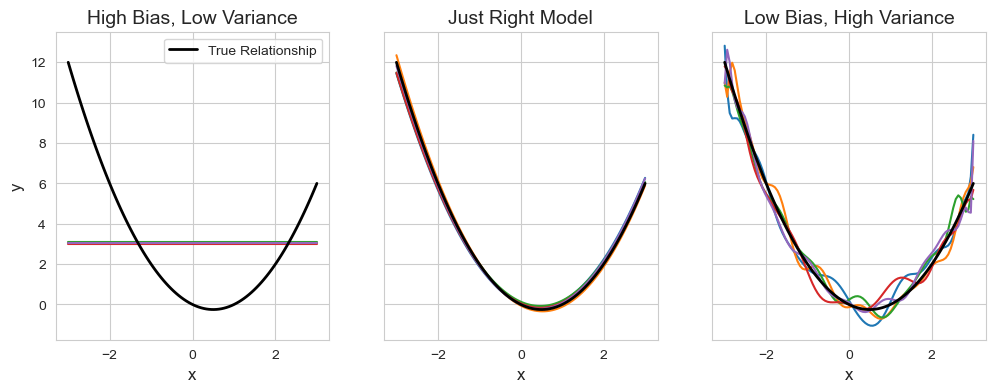

In [5]:
# We'll plot 5 instances of all 3 models
fig,ax = plt.subplots(1,3,figsize = (12,4), sharex = True, sharey = True)
bias = []


for i in range(5):

    # First generate a random training set
    x = np.linspace(-3,3,100)
    y = x*(x-1) + 1.2*np.random.randn(100)

    # Now fit the high variance model
    high_deg_pipe = Pipeline([('poly',PolynomialFeatures(20)),
                             ('reg', LinearRegression(copy_X = True))])

    high_deg_pipe.fit(x.reshape(-1,1),y)

    high_deg_line = high_deg_pipe.predict(x.reshape(-1,1))



    # Now fit the "goldilocks model", the true correct degree
    pipe = Pipeline([('poly',PolynomialFeatures(2)),
                    ('reg', LinearRegression(copy_X = True))])
    pipe.fit(x.reshape(-1,1),y)
    pipe_line = pipe.predict(x.reshape(-1,1))




    # Plot High Bias low Variance plot
    ax[0].plot(x, np.mean(y)*np.ones(len(x)), alpha = 1)
    ax[0].set_title("High Bias, Low Variance",fontsize=14)
    ax[0].set_ylabel("y", fontsize=12)
    ax[0].set_xlabel("x", fontsize=12)


    # Plot Goldilocks model
    ax[1].plot(x, pipe_line, alpha = 1)
    ax[1].set_title("Just Right Model",fontsize=14)
    ax[1].set_xlabel("x", fontsize=12)

    # Plot High Va model
    ax[2].plot(x, high_deg_line, alpha = 1)
    ax[2].set_title("Low Bias, High Variance",fontsize=14)
    ax[2].set_xlabel("x", fontsize=12)

ax[0].plot(x, x*(x-1),'k', label = "True Relationship", alpha = 1, linewidth=2)
ax[0].legend(fontsize=10)
ax[1].plot(x, x*(x-1),'k', label = "True Relationship", alpha = 1, linewidth=2)
ax[2].plot(x, x*(x-1),'k', label = "True Relationship", alpha = 1, linewidth=2)



plt.show()

### The trade-off

As we have discussed the model with the lowest generalization error tends to occur somewhere between the higher variance and higher bias. However, decreasing one often increases the other. A typical picture of the generalization error as a function of model complexity is this cartoon

<img src="lecture_5_assets/bias_variance.png" width="60%"></img>

Let's take a look at the generalization error for this toy problem we have been working with. For us "model complexity" will be the degree of the polynomial we fit. The higher the polynomial degree, the more complex the model.

In [6]:
# Generate a single test set
x_test = np.linspace(-3,3,500)
y_test = x_test*(x_test-1) + 1.2*np.random.randn(500)

In [7]:
test_errors = np.zeros((10,len(range(1,31))))

# We'll generate 10 training sets
for i in range(10):
    x = np.linspace(-3,3,500)
    y = x*(x-1) + 1.2*np.random.randn(500)

    for j in range(1,31):
        pipe = Pipeline([('poly',PolynomialFeatures(j)),
                             ('reg', LinearRegression(copy_X = True))])
        pipe.fit(x.reshape(-1,1),y)
        
        pred = pipe.predict(x_test.reshape(-1,1))
        test_errors[i,j-1] = np.sum((pred - y_test)**2)/len(y_test)

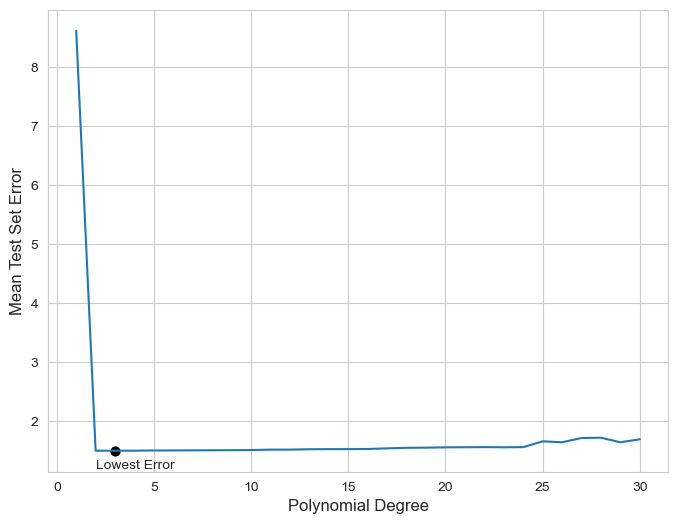

In [8]:
plt.figure(figsize = (8,6))

plt.plot(range(1,31), np.mean(test_errors,axis=0))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Polynomial Degree", fontsize = 12)
plt.ylabel("Mean Test Set Error", fontsize = 12)

plt.scatter(np.argmin(np.mean(test_errors,axis=0)) + 1, 
         np.min(np.mean(test_errors,axis=0)), s=40, c="black")

plt.text(np.argmin(np.mean(test_errors,axis=0)), 
         np.min(np.mean(test_errors,axis=0)-.3), 
         "Lowest Error", fontsize = 10)

plt.show()

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)